In [3]:
from IPython.display import Image

# 权重初始化
　　好的权重初始值能让神经网络接近最优解，使得神经网络更快获得最佳解。

## 测试权重
### 数据集
　　为了了解不同权重的表现，我们使用相同的数据集和神经网络进行测试。这里使用[MNIST](https://en.wikipedia.org/wiki/MNIST_database )的数据集用于演示不同初始权重。提醒一下，MNIST数据集包含手写数字识别，0-9，以及正则化的输入（0.0-1.0）。运行以下代码可以下载和载入MNIST数据集。

In [12]:
%matplotlib inline

import tensorflow as tf
import helper

from tensorflow.examples.tutorials.mnist import input_data

print('Getting MNIST Dataset...')
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
print('Data Extracted')

Getting MNIST Dataset...
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Data Extracted


#### 神经网络

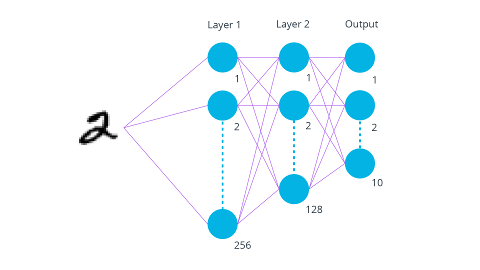

In [5]:
Image('https://github.com/udacity/deep-learning/raw/\
35ad0789cfb4a5d91e9adf8000f0b42be6d37c3b/weight-initialization/images/neural_network.png')

　　对于神经网络，我们使用3层的神经网络，其激活函数为relu，优化方法为Adam。学到的课程也使用其它神经网络，包括不同激活函数和优化方法。

In [11]:
# 保存每层神经元权重的大小
layer_1_weight_shape = (mnist.train.images.shape[1], 256)
layer_2_weight_shape = (256, 128)
layer_3_weight_shape = (128, mnist.train.labels.shape[1])

## 初始权重
### 权重都为0或都为1
　　如果你遵循[奥卡姆剃刀原理](https://en.wikipedia.org/wiki/Occam's_razor)，你可能认为权重设置都为0或为1会是最好的选择，但不是这样的。如果权重相同，每层神经元的输出都相同，造成很难决定哪些权重。<br />
　　使用`helper.compare_init_weights`来比较使用都为0或都为1的权重的损失。这个函数会在神经网络上运行两种不同的初始权重，迭代两次。它会绘制前100 batches的损失，并在大约两个迭代后（~860 batches）打印输出统计。我们绘制了前100的batches用以判断哪种初始权重方式在开始时表现更好。

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



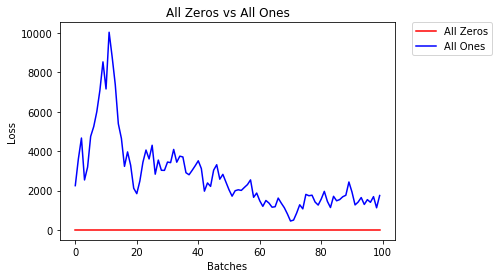

After 858 Batches (2 Epochs):
Validation Accuracy
   11.260% -- All Zeros
   10.020% -- All Ones
Loss
    2.302  -- All Zeros
  294.470  -- All Ones


In [14]:
all_zero_weights = [
    tf.Variable(tf.zeros(layer_1_weight_shape)),
    tf.Variable(tf.zeros(layer_2_weight_shape)),
    tf.Variable(tf.zeros(layer_3_weight_shape))
]

all_one_weights = [
    tf.Variable(tf.ones(layer_1_weight_shape)),
    tf.Variable(tf.ones(layer_2_weight_shape)),
    tf.Variable(tf.ones(layer_3_weight_shape))
]

helper.compare_init_weights(
    mnist,
    'All Zeros vs All Ones',
    [
        (all_zero_weights, 'All Zeros'),
        (all_one_weights, 'All Ones')])

　　就像你看到的，权重全为0或全为1的准确率都在10%左右。神经网络很难判断哪些权重该训练（更新），因为每层神经元的输出都相同。为了避免神经元的输出相同，使用不同的权重。我们可以随机这些权重，以避免每次运行陷入局部极小值。一种获取权重的好方法是从均匀分布中随机取样。

### 均匀分布
　　[均匀分布](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous%29) 即从一组数字中取出任何一个数字的概率是相等的。我们将从连续分布中挑选权重值，因此选中相同值的概率是很小的。使用`tf.random_uniform` 函数来从均匀分布中随机取数。

>#### [`tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)`](https://www.tensorflow.org/api_docs/python/tf/random_uniform)
>Outputs random values from a uniform distribution.

>The generated values follow a uniform distribution in the range [minval, maxval). The lower bound minval is included in the range, while the upper bound maxval is excluded.

>- **shape:** A 1-D integer Tensor or Python array. The shape of the output tensor.
- **minval:** A 0-D Tensor or Python value of type dtype. The lower bound on the range of random values to generate. Defaults to 0.
- **maxval:** A 0-D Tensor or Python value of type dtype. The upper bound on the range of random values to generate. Defaults to 1 if dtype is floating point.
- **dtype:** The type of the output: float32, float64, int32, or int64.
- **seed:** A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- **name:** A name for the operation (optional).

　　使用直方图可以可视化均匀分布。通过 `helper.hist_dist` 函数将 `tf.random_uniform([1000], -3, 3)` 生成的值映射为直方图，为`1000`各随机浮点数值从
 `-3` 到 `3`，包含 `3`。

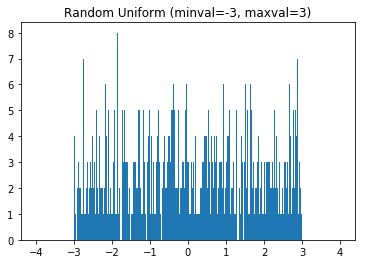

In [15]:
helper.hist_dist('Random Uniform (minval=-3, maxval=3)', tf.random_uniform([1000], -3, 3))

### 基线
　　当神经网络如何使用 `tf.random_uniform`默认的值进行训练，其默认值为`minval=0.0` 和 `maxval=1.0`。

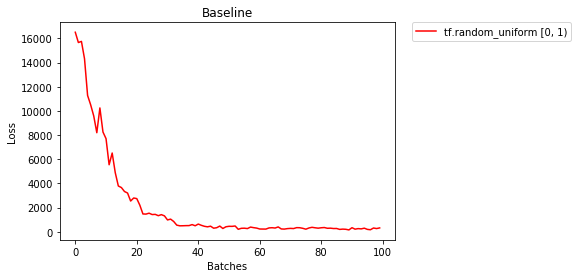

After 858 Batches (2 Epochs):
Validation Accuracy
   77.820% -- tf.random_uniform [0, 1)
Loss
   17.827  -- tf.random_uniform [0, 1)


In [16]:
# tf.random_uniform的默认值为minval=0 和maxval=1
basline_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape))
]

helper.compare_init_weights(
    mnist,
    'Baseline',
    [(basline_weights, 'tf.random_uniform [0, 1)')])

　　损失图显示神经网络正在学习，没有全为0或全为1，正在朝着正确的方法前进。

### 权重设定的一般规则
　　在神经网络中设置权重的一般规则是接近0，但不要太小。一个好的初始权重为$[-y, y]$ ，其中$y=1/\sqrt{n}$ （$n$ 为给定神经元的输入数量）。

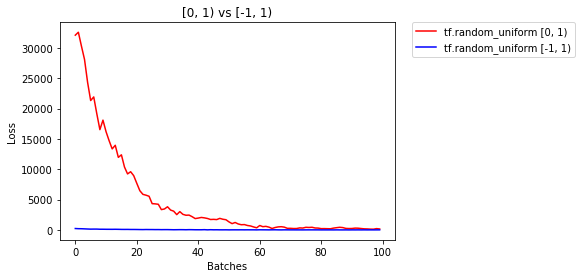

After 858 Batches (2 Epochs):
Validation Accuracy
   84.140% -- tf.random_uniform [0, 1)
   89.800% -- tf.random_uniform [-1, 1)
Loss
    9.999  -- tf.random_uniform [0, 1)
    1.868  -- tf.random_uniform [-1, 1)


In [17]:
uniform_neg1to1_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1, 1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1, 1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1, 1))
]

helper.compare_init_weights(
    mnist,
    '[0, 1) vs [-1, 1)',
    [
        (basline_weights, 'tf.random_uniform [0, 1)'),
        (uniform_neg1to1_weights, 'tf.random_uniform [-1, 1)')])

　　使用[-1, 1)的神经网络，其准确率和损失更好。那是否可以在取更小的权重值？

### 更小的权重值
　　接着比较[-0.1, 0.1), [-0.01, 0.01), 和 [-0.001, 0.001) ，看权重值是否能更小。
Let's compare [-0.1, 0.1), [-0.01, 0.01), and [-0.001, 0.001) to see how small is too small.  We'll also set `plot_n_batches=None` to show all the batches in the plot.

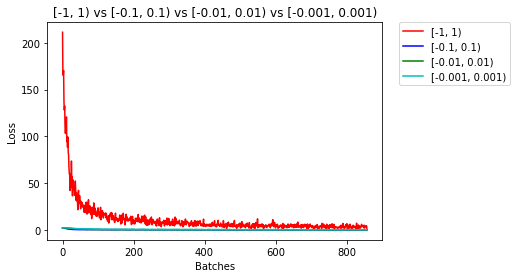

After 858 Batches (2 Epochs):
Validation Accuracy
   89.800% -- [-1, 1)
   96.940% -- [-0.1, 0.1)
   95.740% -- [-0.01, 0.01)
   94.400% -- [-0.001, 0.001)
Loss
    0.728  -- [-1, 1)
    0.073  -- [-0.1, 0.1)
    0.180  -- [-0.01, 0.01)
    0.251  -- [-0.001, 0.001)


In [18]:
uniform_neg01to01_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.1, 0.1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.1, 0.1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.1, 0.1))
]

uniform_neg001to001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.01, 0.01)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.01, 0.01)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.01, 0.01))
]

uniform_neg0001to0001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.001, 0.001)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.001, 0.001)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.001, 0.001))
]

helper.compare_init_weights(
    mnist,
    '[-1, 1) vs [-0.1, 0.1) vs [-0.01, 0.01) vs [-0.001, 0.001)',
    [
        (uniform_neg1to1_weights, '[-1, 1)'),
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (uniform_neg001to001_weights, '[-0.01, 0.01)'),
        (uniform_neg0001to0001_weights, '[-0.001, 0.001)')],
    plot_n_batches=None)

　　看起来[-0.01, 0.01)或更小的权重值实在太小了，接着我们使用前文讲到的规则$y=1/\sqrt{n}$。

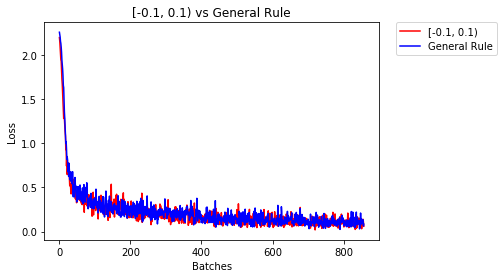

After 858 Batches (2 Epochs):
Validation Accuracy
   96.900% -- [-0.1, 0.1)
   96.680% -- General Rule
Loss
    0.059  -- [-0.1, 0.1)
    0.084  -- General Rule


In [19]:
import numpy as np

general_rule_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1/np.sqrt(layer_1_weight_shape[0]), 1/np.sqrt(layer_1_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1/np.sqrt(layer_2_weight_shape[0]), 1/np.sqrt(layer_2_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1/np.sqrt(layer_3_weight_shape[0]), 1/np.sqrt(layer_3_weight_shape[0])))
]

helper.compare_init_weights(
    mnist,
    '[-0.1, 0.1) vs General Rule',
    [
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (general_rule_weights, 'General Rule')],
    plot_n_batches=None)

　　我们发现定的范围 [-0.1, 0.1) 和 $y=1/\sqrt{n}$ 非常接近。因为均匀分布在给定范围内选择任何值的机会都是相等的。如果我们使用一个更接近于0的分布，如正态分布。


### 正态分布
　　不像均匀分布，[正态分布](https://en.wikipedia.org/wiki/Normal_distribution) 有更高的概率选择接近其均值的数字。为了可视化它，使用`tf.random_normal` 函数将其映射为直方图。

>[tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/random_normal)

>Outputs random values from a normal distribution.

>- **shape:** A 1-D integer Tensor or Python array. The shape of the output tensor.
- **mean:** A 0-D Tensor or Python value of type dtype. The mean of the normal distribution.
- **stddev:** A 0-D Tensor or Python value of type dtype. The standard deviation of the normal distribution.
- **dtype:** The type of the output.
- **seed:** A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- **name:** A name for the operation (optional).

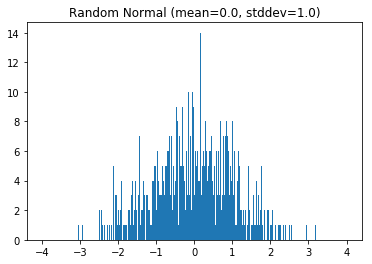

In [21]:
helper.hist_dist('Random Normal (mean=0.0, stddev=1.0)', tf.random_normal([1000]))

　　将正态分布与先前的均匀分布进行对比。

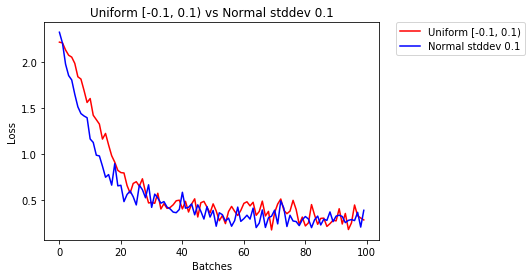

After 858 Batches (2 Epochs):
Validation Accuracy
   97.280% -- Uniform [-0.1, 0.1)
   97.500% -- Normal stddev 0.1
Loss
    0.115  -- Uniform [-0.1, 0.1)
    0.068  -- Normal stddev 0.1


In [22]:
normal_01_weights = [
    tf.Variable(tf.random_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Uniform [-0.1, 0.1) vs Normal stddev 0.1',
    [
        (uniform_neg01to01_weights, 'Uniform [-0.1, 0.1)'),
        (normal_01_weights, 'Normal stddev 0.1')])

　　使用正态分布初始化权重的网络损失和准确率稍微增加。选择接近0，并丢弃 `x` 个标准差的值，即限制变量x取值范围(scope)的一种分布，这种分布叫[截断正态分布](https://en.wikipedia.org/wiki/Truncated_normal_distribution%29)。

### 截断正态分布
>[tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/truncated_normal)

>Outputs random values from a truncated normal distribution.

>The generated values follow a normal distribution with specified mean and standard deviation, except that values whose magnitude is more than 2 standard deviations from the mean are dropped and re-picked.

>- **shape:** A 1-D integer Tensor or Python array. The shape of the output tensor.
- **mean:** A 0-D Tensor or Python value of type dtype. The mean of the truncated normal distribution.
- **stddev:** A 0-D Tensor or Python value of type dtype. The standard deviation of the truncated normal distribution.
- **dtype:** The type of the output.
- **seed:** A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- **name:** A name for the operation (optional).

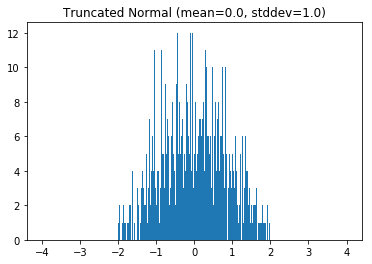

In [23]:
helper.hist_dist('Truncated Normal (mean=0.0, stddev=1.0)', tf.truncated_normal([1000]))

　　同样，将正态分布与截断正态分布进行比较。

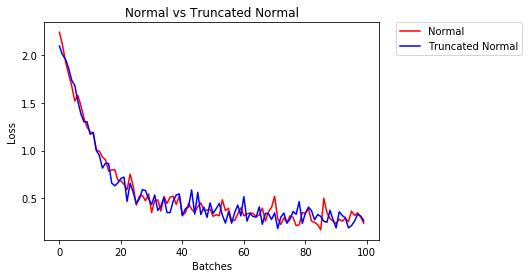

After 858 Batches (2 Epochs):
Validation Accuracy
   96.940% -- Normal
   97.340% -- Truncated Normal
Loss
    0.040  -- Normal
    0.110  -- Truncated Normal


In [25]:
trunc_normal_01_weights = [
    tf.Variable(tf.truncated_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Normal vs Truncated Normal',
    [
        (normal_01_weights, 'Normal'),
        (trunc_normal_01_weights, 'Truncated Normal')])

　　两个看上去都没区别，因为我们使用的网络太小。一个巨大的网络会在正态分布选择更多权重值，增加的选择可能性大于2倍的标准差的可能性。接下来，对比基线和截断正态分布。

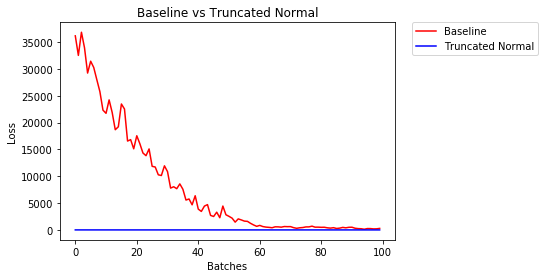

After 858 Batches (2 Epochs):
Validation Accuracy
   67.600% -- Baseline
   97.160% -- Truncated Normal
Loss
   16.850  -- Baseline
    0.164  -- Truncated Normal


In [26]:
helper.compare_init_weights(
    mnist,
    'Baseline vs Truncated Normal',
    [
        (basline_weights, 'Baseline'),
        (trunc_normal_01_weights, 'Truncated Normal')])